# Regression Case Study

**PROBLEM STATEMENT** 

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



**Import required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Read the data**

In [2]:
cars=pd.read_csv('Cars.csv')

**Check the Head**

In [3]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


##### Observation:

Name field has both brand name and the name of the car.

Mileage, Engine and Power field have units of measurement along with their respective value which has to be cleaned.

Many values in New_Price field are missing.  

**Get the info**

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


##### Observation:

We have 5961 observations and 15 features.

Missing values observed in Location, Year, Kilometers_Driven, Transmission, Owner_Type, Mileage, Engine, Power, Colour, Seats , No. of doors and New_Price field.

Only 824 out of 5961 values available for New_Price field.

Mileage, Engine, Power have to be converted to numeric fields once cleaned up

**Get the Summary Statistics**

In [5]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5961,212,Maruti Swift,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5950,11,Mumbai,781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5959,NaN,NaN,NaN,2013.39,3.24305,1998,2011.5,2014,2016,2019
Kilometers_Driven,5953,NaN,NaN,NaN,58711.1,91712.2,171,33931,53000,73000,6.5e+06
Fuel_Type,5961,5,Diesel,3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5934,2,Manual,4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5946,4,First,4875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5959,439,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5944,143,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5929,369,74 bhp,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Observation:

Based on the Name there are 212 categories of car in the data with Maruti Swift being highest in number.

Observations are available for 11 locations with maximum observations from Mumbai location.

Data is avaliable from year 1998 through 2019.

Most of the observations correspond to Diesel car. Also, majority of the observations have transmission as manual  and are from 1st owner.

Number of seats in the car range from minimum of 2 to maximum of 10.

**Check for Null Values**

In [6]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [7]:
5137/5961

0.8617681597047475

**Since New_Price has over 86% Null values, we would drop this column for now**

In [8]:
cars=cars.drop('New_Price',axis=1)

In [9]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


**Cleanup of Mileage Engine and Power fields**

In [10]:
cars['Power'].value_counts().sort_index(ascending=False)

null bhp     103
99.6 bhp       5
99 bhp        17
98.96 bhp      9
98.82 bhp      2
            ... 
102.5 bhp      8
102 bhp       56
101 bhp        4
100.6 bhp     39
100 bhp       54
Name: Power, Length: 369, dtype: int64

In [11]:
cars['Power'] = cars['Power'].replace('null bhp', 0)
cars['Power'] = cars['Power'].str.replace('bhp','').astype('float')

In [12]:
cars['Power'].describe()

count    5826.000000
mean      113.434113
std        53.935723
min        34.200000
25%        75.000000
50%        98.145000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [13]:
cars['Mileage'].value_counts().sort_index()

0.0 kmpl      56
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: Mileage, Length: 439, dtype: int64

In [14]:
cars['Mileage'] = cars['Mileage'].str.replace('kmpl','')

In [15]:
cars['Mileage'] = cars['Mileage'].str.replace('km/kg','')

In [16]:
cars['Mileage'] = cars['Mileage'].astype('float')

In [17]:
cars['Engine'].value_counts().sort_index()

1047 CC      4
1061 CC     27
1086 CC    107
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: Engine, Length: 143, dtype: int64

In [18]:
cars['Engine'] = cars['Engine'].str.replace('CC','').astype('float')

In [19]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Null Values Imputation**

In [20]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [21]:
cols

Index(['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors'],
      dtype='object')

In [22]:
objects=cars[cols].select_dtypes(include=['object']).columns
non_objects=cars[cols].select_dtypes(exclude=['object']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose=0)
imputer = imputer.fit(cars[non_objects].iloc[:,:])

In [25]:
cars[non_objects]=imputer.transform(cars[non_objects])

**Impute the Object values using Mode**

In [26]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(cars[objects].iloc[:,:])

In [27]:
cars[objects]=imputer.transform(cars[objects])

In [28]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
dtype: int64

**There are no Null values now**

**Check for Duplicates**

In [29]:
cars.duplicated().sum()

2

In [30]:
cars.drop_duplicates(inplace=True)

**Create a new column 'Brand' which has the brand name of the Cars**

In [31]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [32]:
cars.Brand.value_counts()

Maruti           1187
Hyundai          1100
Honda             601
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Bentley             1
Smart               1
Lamborghini         1
Name: Brand, dtype: int64

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [33]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

**Create a new column 'Model' which has the Model name of the Cars**

In [34]:
cars['Model']=cars.Name.apply(lambda x:x.split(' ')[1])

In [35]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

1                3
1000             1
3               98
5               68
6                7
7               13
800             12
A                8
A-Star          17
A3               4
A4              78
A6              49
A7               3
A8               2
Accent          18
Accord          26
Alto           142
Amaze          106
Ameo            19
Aspire           4
Aveo            14
Avventura        4
B               12
BR-V             3
BRV              5
Baleno          62
Beat            46
Beetle           1
Bolero          15
Bolt             4
Boxster          1
Brio            60
C-Class          3
CLA             13
CLS-Class        1
CR-V            26
Camry           11
Captiva          2
Captur           3
Cayenne          7
Cayman           2
Cedia            2
Celerio         58
Ciaz            71
City           265
Civic           32
Classic          1
Clubman          1
Compass         15
Continental      1
Cooper          24
Corolla         68
Countryman  

In [36]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_values(ascending=False)

Swift          343
City           265
i20            247
Verna          170
Innova         164
i10            156
Grand          156
Wagon          153
Polo           151
Alto           142
XUV500         113
Vento          107
Amaze          106
New            102
Fortuner       101
Figo           100
3               98
Creta           93
E-Class         88
Duster          83
A4              78
Ertiga          75
Santro          71
Ciaz            71
Corolla         68
5               68
Ritz            64
Baleno          62
EON             61
Scorpio         61
Brio            60
Etios           60
Xcent           59
Celerio         58
Jazz            57
Rover           57
Ecosport        53
Superb          49
A6              49
Rapid           47
Beat            46
Vitara          43
EcoSport        42
KWID            40
Indica          40
Fiesta          40
Q7              38
Endeavour       38
SX4             37
Micra           33
X1              32
Civic           32
Octavia     

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format.

In [37]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

In [38]:
cars.drop('Name', axis=1, inplace=True)

**Create a new column 'CarAge'**

Hint: Subtract Year by current year

In [39]:
import datetime

In [40]:
now = datetime.datetime.now()
cars['CarAge']= now.year-cars.Year

In [41]:
cars.CarAge.describe()

count    5959.000000
mean        6.610002
std         3.241837
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: CarAge, dtype: float64

In [42]:
cars.drop('Year', axis=1, inplace=True)

**Check for Outliers**

C:\Users\Divya\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Divya\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Divya\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Divya\anaconda3\lib\site-

Shape before Outliers Treatment (5959, 15)


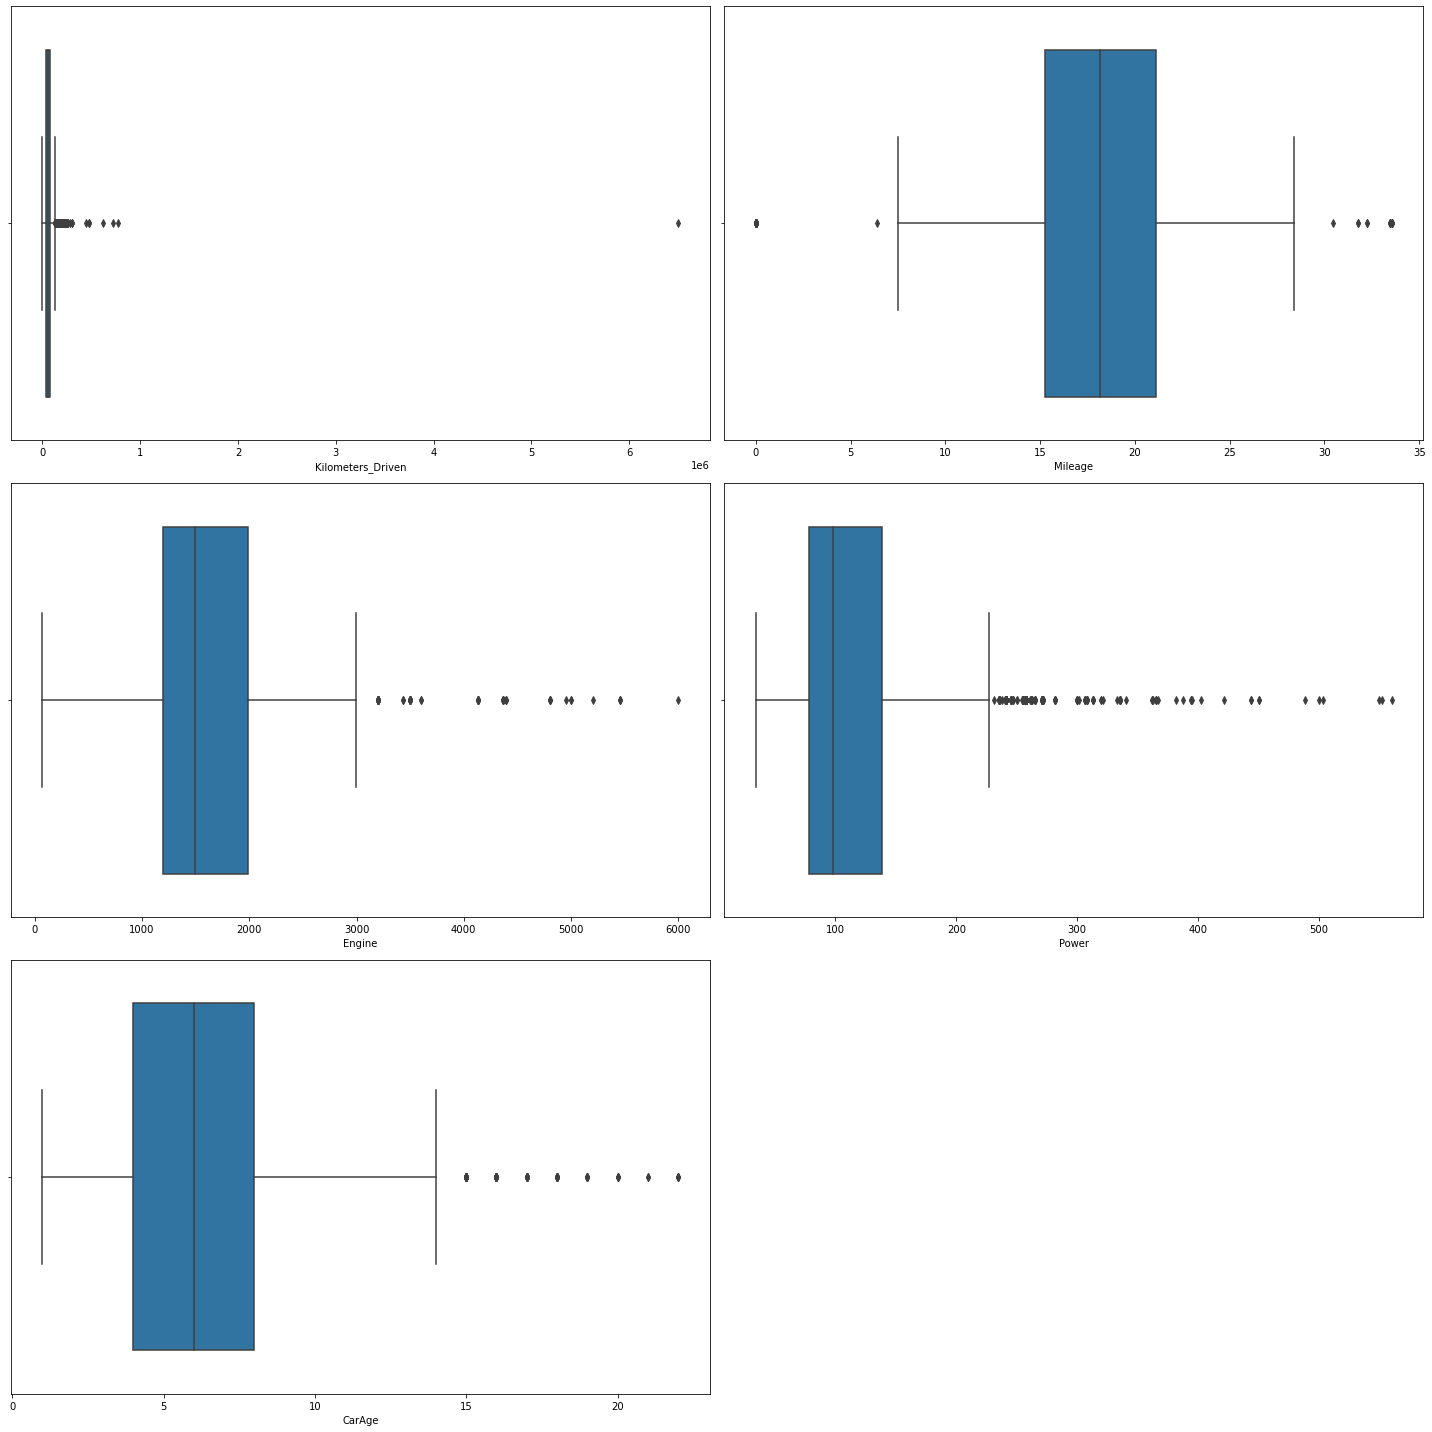

In [43]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cars.shape)

##### Observation
All numeric fields have outliers. 

**Outliers Treatment**

In [44]:
# Define a function to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
lr,ur=remove_outlier(cars['Kilometers_Driven'])
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']>ur,ur,cars['Kilometers_Driven'])

lr,ur=remove_outlier(cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']>ur,ur,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']<lr,lr,cars['Mileage'])

lr,ur=remove_outlier(cars['Engine'])
cars['Engine']=np.where(cars['Engine']>ur,ur,cars['Engine'])

lr,ur=remove_outlier(cars['Power'])
cars['Power']=np.where(cars['Power']>ur,ur,cars['Power'])

lr,ur=remove_outlier(cars['CarAge'])
cars['CarAge']=np.where(cars['CarAge']>ur,ur,cars['CarAge'])

C:\Users\Divya\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Divya\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Divya\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Divya\anaconda3\lib\site-

Shape After Outliers Treatment (5959, 15)


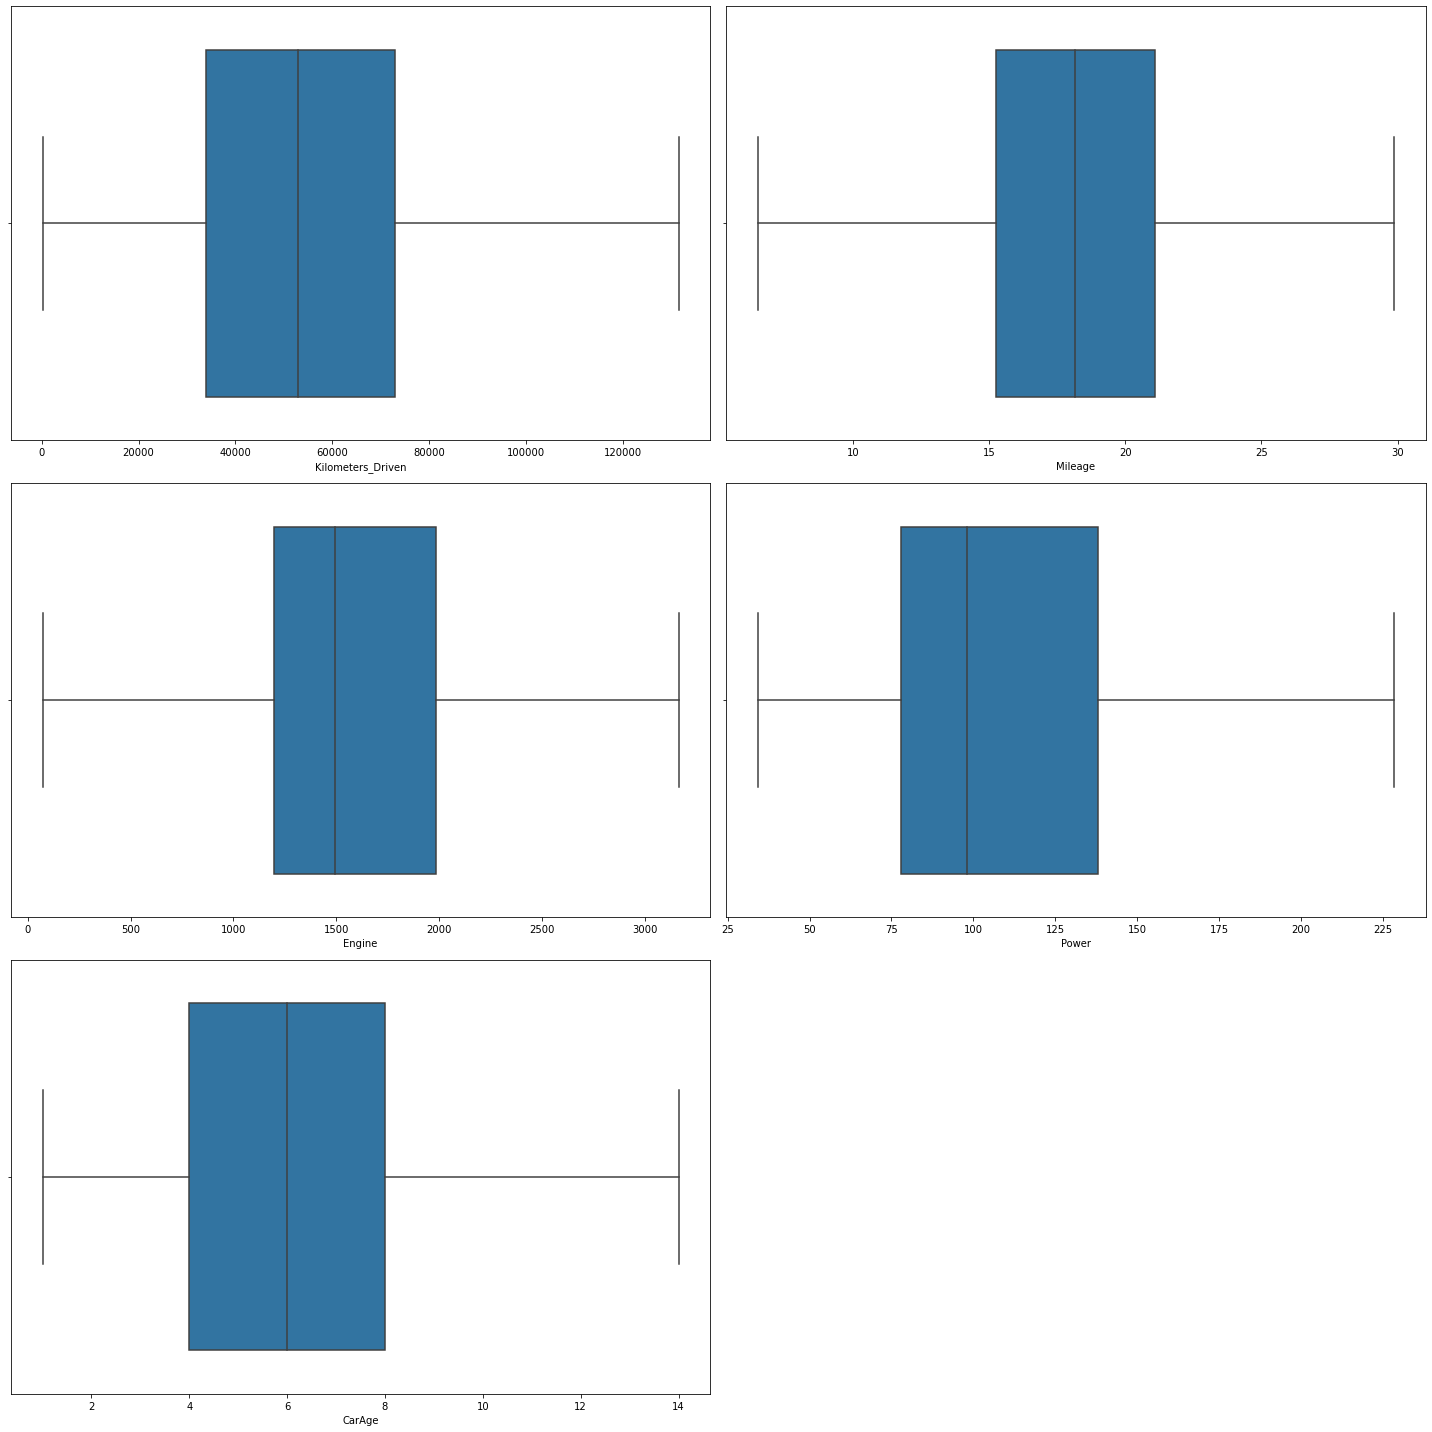

In [46]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',cars.shape)

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

#### EDA

In [47]:
cars['Price'].describe()

count    5959.000000
mean        9.529916
std        11.215743
min         0.440000
25%         3.500000
50%         5.660000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

C:\Users\Divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

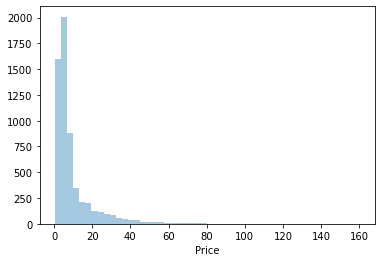

In [48]:
sns.distplot(cars['Price'], kde=False)

##### Observation:
Price is right skewed. 

Atleast 75% of the cars have a price of <= 10

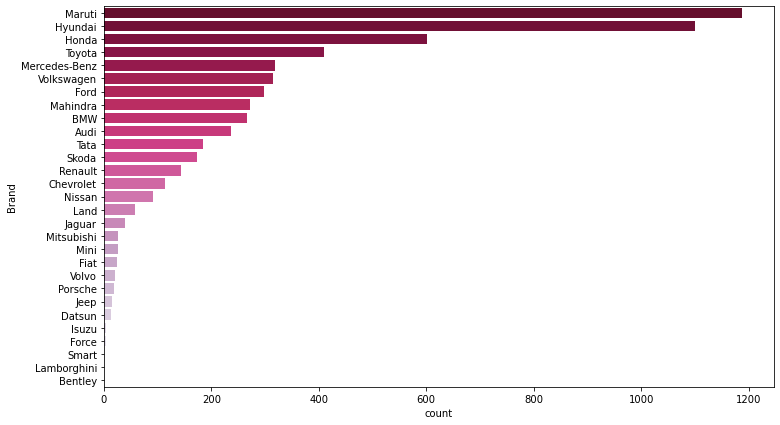

In [49]:
plt.figure(figsize=(12,7))
sns.countplot(y=(cars.Brand),order = cars.Brand.value_counts().index,palette='PuRd_r');

##### Observation

Maximum data is available for Maruti, Hyundai, Honda, Toyota brand

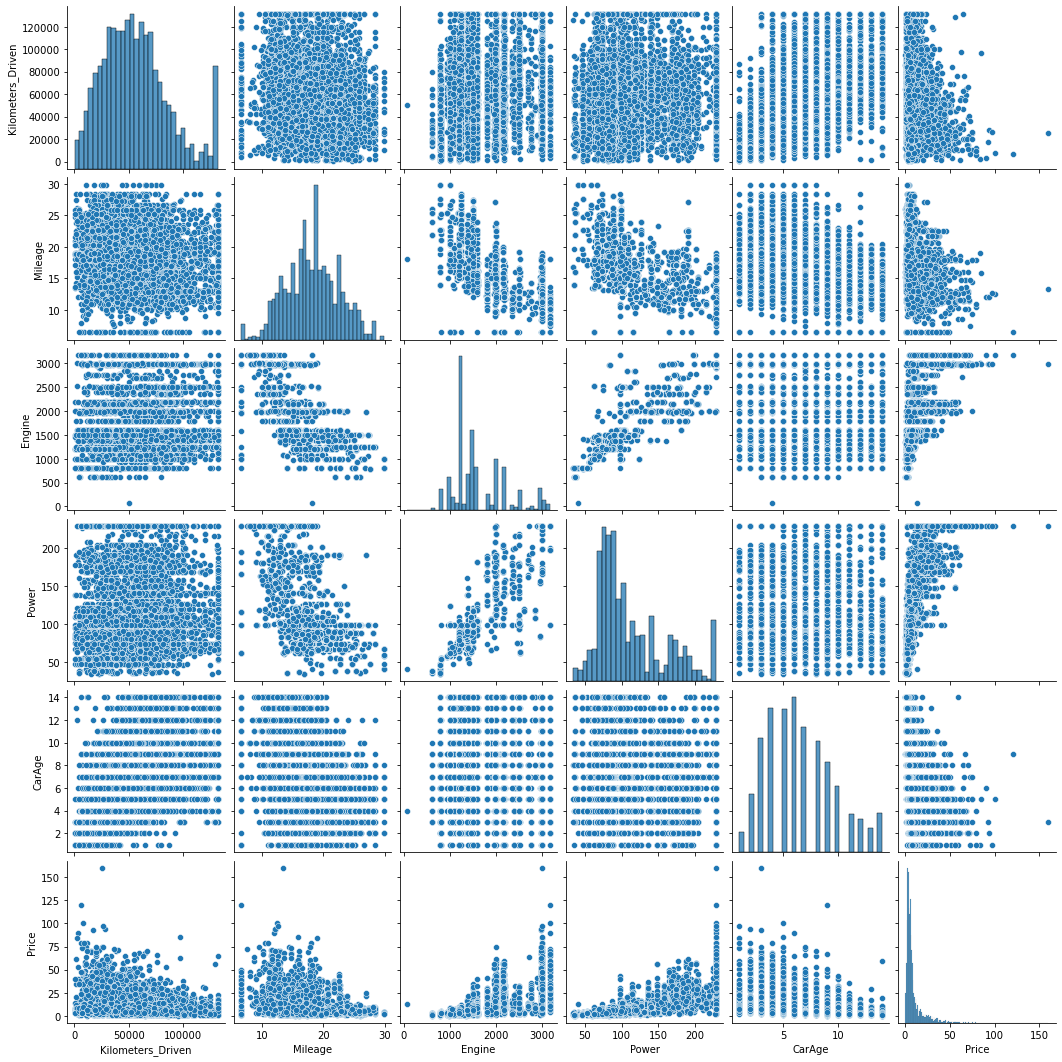

In [50]:
sns.pairplot(data = cars, vars = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge', 'Price']);

**Correlation Plot**

<AxesSubplot:>

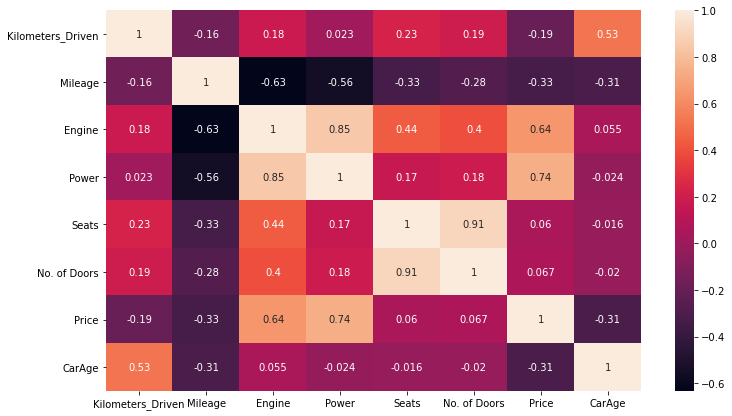

In [51]:
plt.figure(figsize=(12,7))
sns.heatmap(cars.iloc[:].corr(),annot=True)

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and Seats)

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

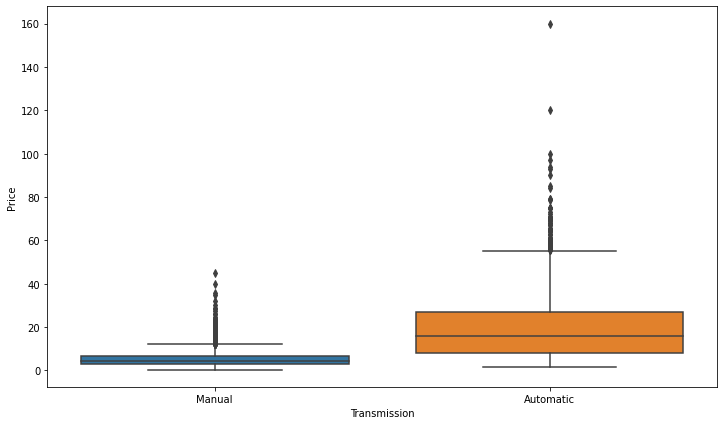

In [52]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Transmission', y='Price', data=cars)

##### Observation:
The range and price of automatic cars is much higher compared to the manual cars

#### Data Preparation for the model

**Encode the Data**

In [53]:
cars.select_dtypes(include='object').head()

,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model
0,Pune,Diesel,Manual,Third,Black/Silver,Mahindra,Scorpio
1,Kochi,Petrol,Manual,First,Others,Maruti,Baleno
2,Bangalore,Diesel,Manual,First,White,Mahindra,Xylo
3,Delhi,Diesel,Manual,First,White,Hyundai,Grand
4,Delhi,Diesel,Manual,First,Others,Toyota,Innova


There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [54]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes

In [55]:
cars.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,CarAge
0,10,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6.00,15,158,8.0
1,7,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8.32,16,25,2.0
2,1,131500.0,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4.00,15,198,7.0
3,4,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3.49,9,89,6.0
4,4,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6.40,26,96,9.0


**Split the Data**

In [56]:
x=cars.drop(['Price','Engine','Seats'],axis=1) 
y=cars.Price

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [59]:
x_train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Colour,No. of Doors,Brand,Model,CarAge
4965,9,57000.0,4,0,0,16.80,118.00,1,4.0,8,44,9.0
4012,10,131500.0,1,1,2,17.10,70.00,2,4.0,25,95,12.0
3616,8,51000.0,1,0,0,16.07,181.00,1,4.0,1,2,10.0
1290,5,26400.0,4,1,0,23.10,67.04,2,4.0,16,42,3.0
2211,3,22684.0,4,1,0,18.60,81.83,2,4.0,9,204,2.0


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

#### Linear Regression (sklearn)

In [61]:
regression_model = LinearRegression()
regression_model = regression_model.fit(x_train,y_train)

In [62]:
regression_model.score(x_train,y_train)

0.6631849396782045

In [63]:
regression_model.score(x_test,y_test)

0.6729657758002655

In [64]:
regression_model.coef_

array([-2.25676176e-01, -3.79508173e-05, -1.12177128e+00, -2.48568992e+00,
       -1.17149990e-01, -3.29667528e-01,  1.38362146e-01,  2.26349794e-02,
       -2.92594398e+00, -2.34538039e-02,  2.97237257e-03, -9.36535393e-01])

In [65]:
regression_model.intercept_

26.19611523501728

In [66]:
y_pred_train = regression_model.predict(x_train)
y_pred_test = regression_model.predict(x_test)

In [67]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

In [68]:
rmse_train

6.504564831217451

In [69]:
rmse_test

6.422254468223645

#### Decision Tree 

In [70]:
dtr = DecisionTreeRegressor(random_state=123)
dtr = dtr.fit(x_train,y_train)

In [71]:
dtr.score(x_train,y_train)

0.9999969343119588

In [72]:
dtr.score(x_test,y_test)

0.7923467075467003

In [73]:
y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

In [74]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

In [75]:
rmse_train

0.0196239521127528

In [76]:
rmse_test

5.11752906930364

In [77]:
print (pd.DataFrame(dtr.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                        Imp
Power              0.646019
CarAge             0.180262
Kilometers_Driven  0.041199
Mileage            0.035492
Brand              0.021987
Model              0.020241
Transmission       0.015317
Location           0.015317
No. of Doors       0.013938
Colour             0.004364
Fuel_Type          0.003692
Owner_Type         0.002173


#### Random Forest

In [78]:
rfr = RandomForestRegressor(random_state=123)
rfr = rfr.fit(x_train, y_train)

In [79]:
rfr.score(x_train,y_train)

0.9856009182863796

In [80]:
rfr.score(x_test,y_test)

0.8537200113138378

In [81]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

In [82]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

In [83]:
rmse_train

1.3448996906488087

In [84]:
rmse_test

4.2951997589737365

In [85]:
print (pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                        Imp
Power              0.645786
CarAge             0.180817
Kilometers_Driven  0.048017
Mileage            0.034043
Brand              0.026647
Model              0.020765
Location           0.016888
Transmission       0.008652
No. of Doors       0.006490
Colour             0.005915
Fuel_Type          0.004306
Owner_Type         0.001674


**Grid Search on Decision Tree**

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr= DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 5)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 15}


##### Let us take Max_depth as 15, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

**Using Grid Search for Random Forest**

In [88]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15],
    'min_samples_split': [30, 50],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [89]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15],
                         'min_samples_split': [30, 50],
                         'n_estimators': [300, 500]})

In [90]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [91]:
#best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}

Use the tuned parameters to build the new models. Here we have used a for loop to do the same after setting the parameters for respective techniques

In [92]:
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 300,
                            random_state=123)
dtr = DecisionTreeRegressor(max_depth=15,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          6.504565   6.422254        0.663185    0.672966
Decision Tree Regressor    3.831054   4.983320        0.883160    0.803095
Random Forest Regressor    3.583954   4.339533        0.897746    0.850685


> **So what do you think which algo performed well here?**

Random Forest or Decision Tree or Linear Regression?

> **Which performance metric will you prefer here?**

RMSE or R Squared?


**Now, Go on explore the dataset and do more feature engineering, EDA and find out the best way to get better R Squared and lower RMSE**

#### Linear Regression using statsmodel

In [93]:
import statsmodels.formula.api as smf

In [94]:
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [95]:
data_train.rename(columns = {"No. of Doors": "No_of_Doors"}, inplace = True)
data_test.rename(columns = {"No. of Doors": "No_of_Doors"}, inplace = True) 

In [96]:
expr = 'Price ~ Location + Kilometers_Driven + Fuel_Type + Transmission + Owner_Type + Mileage + Power + Colour + No_of_Doors + Brand + Model + CarAge'

In [97]:
lm1 = smf.ols(formula= expr, data = data_train).fit()

In [98]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     682.3
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:22:34   Log-Likelihood:                -13729.
No. Observations:                4171   AIC:                         2.748e+04
Df Residuals:                    4158   BIC:                         2.757e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            26.1961      2.11

#### Decision Tree Plot

In [99]:
from sklearn import tree

In [100]:
dtr1 = DecisionTreeRegressor(max_depth=3)
dtr1 = dtr1.fit(x_train,y_train)

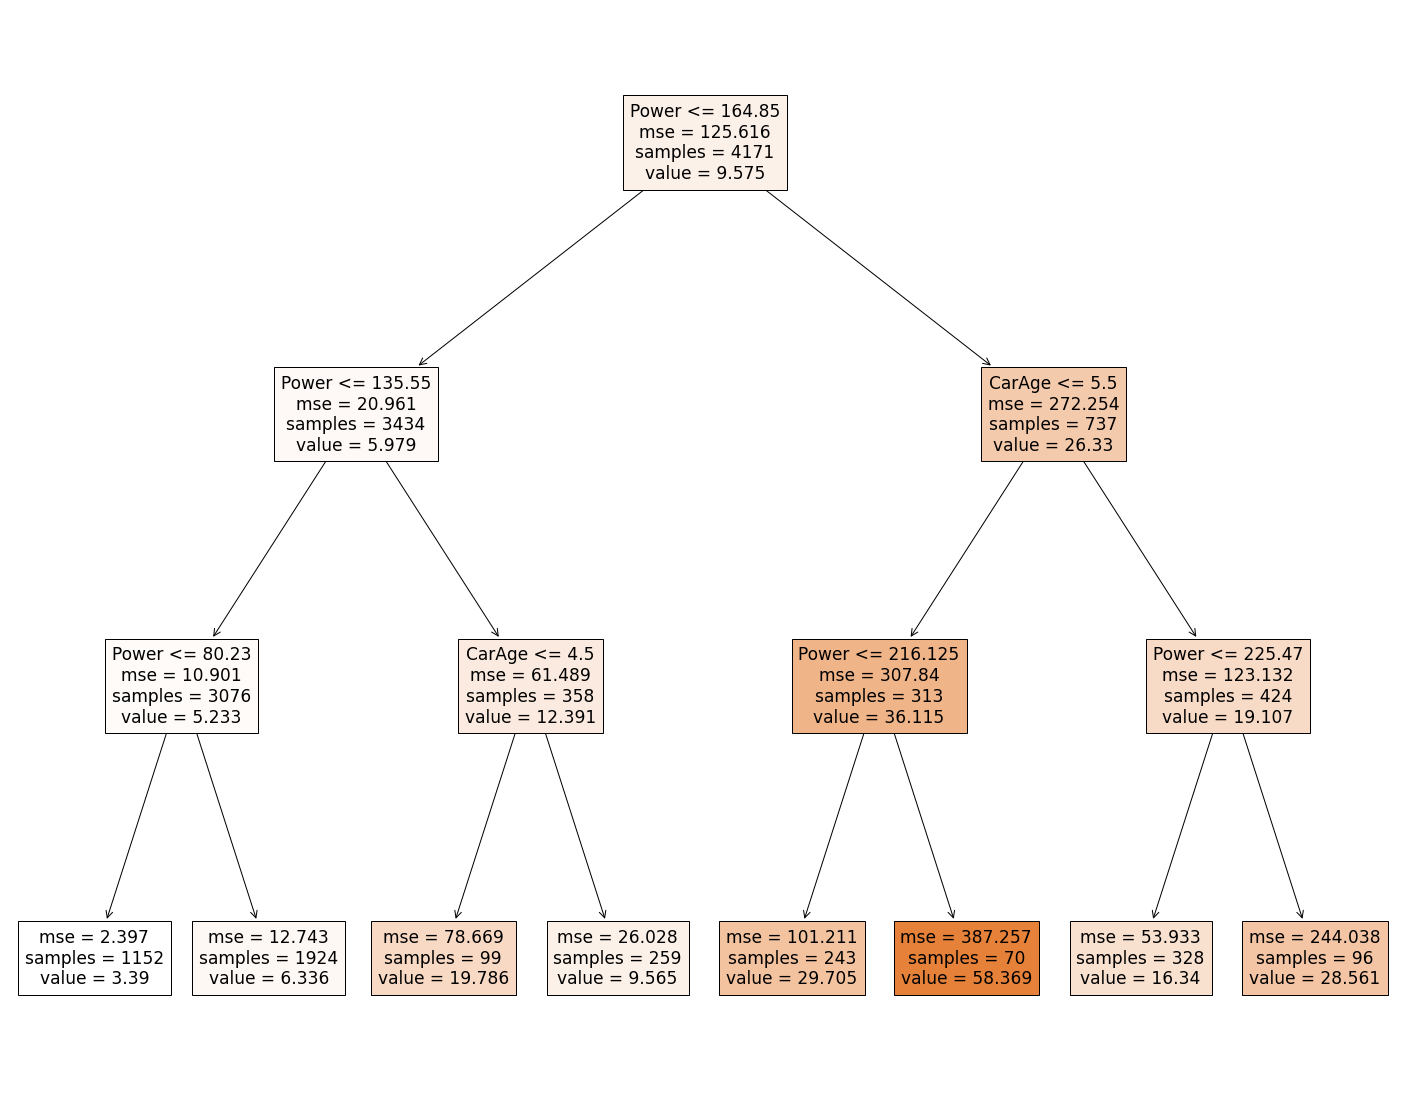

In [101]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr1, feature_names=x_train.columns, filled=True)